In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

# Read and display a PPM image
img = mpimg.imread("GTSRB/Final_Training/Images/00000/00000_00001.ppm")
print(img.shape)  # Check the shape of the image
img_array = np.array(img, dtype=np.uint8).reshape((30, 30, 3))
plt.figure(figsize=(30, 30), dpi=1)  # 1:1 pixel display
plt.imshow(img_array, interpolation='nearest')
plt.axis('off')
plt.show()


(30, 30, 3)


In [48]:
img_dir = "GTSRB/Final_Training/Images/"
label_names = arr = [str(i).zfill(5) for i in range(43)]
images = []

# Display number of img for each label
for label in label_names:
    img_files = [f for f in os.listdir(os.path.join(img_dir, label)) if f.endswith('.ppm')]
    images.append((label, img_files))
    # print(f"Label {label}: {len(img_files)} images")

In [54]:
len(images[0][1]) # Display number of images for the first label

210

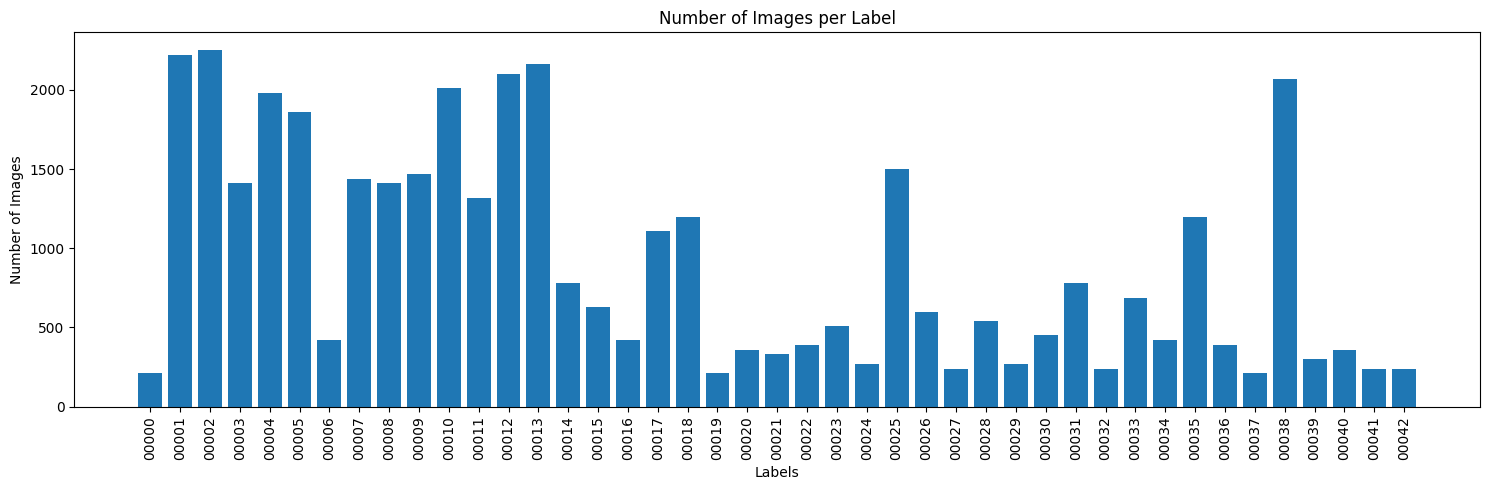

In [55]:
#plot number of images per label
labels, counts = zip(*[(label, len(files)) for label, files in images])
plt.figure(figsize=(15, 5))
plt.bar(labels, counts)
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.title('Number of Images per Label')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [58]:
import os
from PIL import Image

input_dir = "GTSRB/Final_Training/Images/"
output_dir = "GTSRB/Final_Training/Images_32x32/"

# Get all label subfolders (classes)
label_names = [name for name in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, name))]

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

for label in label_names:
    label_input_dir = os.path.join(input_dir, label)
    label_output_dir = os.path.join(output_dir, label)
    os.makedirs(label_output_dir, exist_ok=True)

    # Get all .ppm files in the label directory
    img_files = [f for f in os.listdir(label_input_dir) if f.endswith('.ppm')]

    for img_file in img_files:
        img_path = os.path.join(label_input_dir, img_file)
        try:
            # Open and resize image (will downsample or upsample as needed)
            img = Image.open(img_path)
            img_resized = img.resize((32, 32), Image.LANCZOS)  # Best quality for both up and down

            # Save as PNG
            output_path = os.path.join(label_output_dir, img_file.replace('.ppm', '.png'))
            img_resized.save(output_path, format='PNG')
        except Exception as e:
            print(f"Failed to process {img_path}: {e}")

print(f"✅ All images resized to 32x32 and saved in: {output_dir}")



✅ All images resized to 32x32 and saved in: GTSRB/Final_Training/Images_32x32/


DATALOADER

In [68]:
import os
import random
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

class GTSRB32Dataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx])
        if self.transform:
            img = self.transform(img)
        return img, self.labels[idx]


In [69]:
from sklearn.model_selection import train_test_split

root_dir = 'GTSRB/Final_Training/Images_32x32'
all_image_paths = []
all_labels = []

# Load all image paths and labels
for label_name in sorted(os.listdir(root_dir)):
    label_dir = os.path.join(root_dir, label_name)
    if not os.path.isdir(label_dir):
        continue
    for fname in os.listdir(label_dir):
        if fname.endswith('.png'):
            all_image_paths.append(os.path.join(label_dir, fname))
            all_labels.append(int(label_name))

# Split into train/test (e.g., 80% train, 20% test)
train_paths, test_paths, train_labels, test_labels = train_test_split(
    all_image_paths, all_labels, test_size=0.2, stratify=all_labels, random_state=42
)

# Define transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Create datasets
train_dataset = GTSRB32Dataset(train_paths, train_labels, transform=transform)
test_dataset = GTSRB32Dataset(test_paths, test_labels, transform=transform)


In [117]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.827451..1.0].


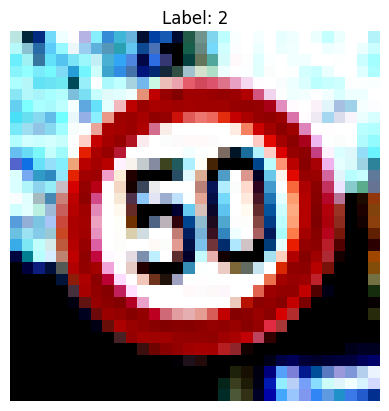

In [87]:
import matplotlib.pyplot as plt
import torchvision

# Get one batch from train_loader
images, labels = next(iter(train_loader))  # images: [B, 3, 32, 32], labels: [B]

# Show the first image in the batch
img = torchvision.utils.make_grid(images[0])  # convert 3x32x32 to viewable image

# Convert to numpy and transpose to HWC
npimg = img.numpy().transpose((1, 2, 0))

plt.imshow(npimg)
plt.title(f"Label: {labels[0].item()}")
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.827451..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.94509804..-0.67058825].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.77254903..-0.41176468].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.88235295..0.8901961].


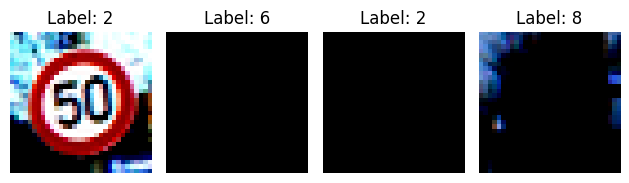

In [88]:
for i in range(4):
    img = images[i].numpy().transpose((1, 2, 0))
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [92]:
classes = sorted(os.listdir(root_dir))
print("Classes:", classes)

Classes: ['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042']


BASELINE MODEL ARCHITECHTURE

In [97]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 43)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [98]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [101]:
import torch
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 0:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.001
[1,   101] loss: 0.128
[1,   201] loss: 0.118
[1,   301] loss: 0.110
[1,   401] loss: 0.101
[2,     1] loss: 0.001
[2,   101] loss: 0.092
[2,   201] loss: 0.085
[2,   301] loss: 0.080
[2,   401] loss: 0.076
[3,     1] loss: 0.001
[3,   101] loss: 0.070
[3,   201] loss: 0.066
[3,   301] loss: 0.061
[3,   401] loss: 0.057
[4,     1] loss: 0.001
[4,   101] loss: 0.048
[4,   201] loss: 0.045
[4,   301] loss: 0.042
[4,   401] loss: 0.040
[5,     1] loss: 0.000
[5,   101] loss: 0.034
[5,   201] loss: 0.031
[5,   301] loss: 0.030
[5,   401] loss: 0.027
Finished Training


In [102]:
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

In [104]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

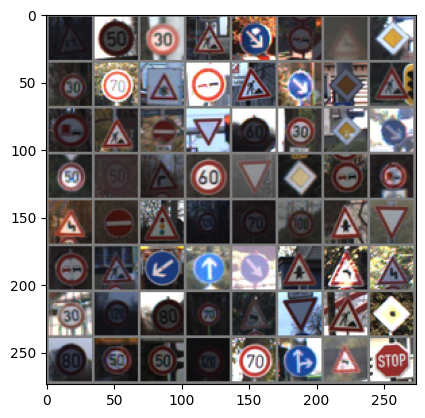

GroundTruth:  00028 00002 00001 00025


In [105]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [106]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [107]:
outputs = net(images)

In [108]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  00030 00002 00001 00025


In [109]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 86 %


In [110]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 00000 is 40.5 %
Accuracy for class: 00001 is 77.9 %
Accuracy for class: 00002 is 80.7 %
Accuracy for class: 00003 is 87.6 %
Accuracy for class: 00004 is 86.6 %
Accuracy for class: 00005 is 79.0 %
Accuracy for class: 00006 is 97.6 %
Accuracy for class: 00007 is 71.2 %
Accuracy for class: 00008 is 85.5 %
Accuracy for class: 00009 is 88.8 %
Accuracy for class: 00010 is 96.8 %
Accuracy for class: 00011 is 95.1 %
Accuracy for class: 00012 is 96.4 %
Accuracy for class: 00013 is 98.1 %
Accuracy for class: 00014 is 96.2 %
Accuracy for class: 00015 is 84.1 %
Accuracy for class: 00016 is 90.5 %
Accuracy for class: 00017 is 98.2 %
Accuracy for class: 00018 is 88.8 %
Accuracy for class: 00019 is 50.0 %
Accuracy for class: 00020 is 58.3 %
Accuracy for class: 00021 is 27.3 %
Accuracy for class: 00022 is 94.9 %
Accuracy for class: 00023 is 69.6 %
Accuracy for class: 00024 is 70.4 %
Accuracy for class: 00025 is 98.0 %
Accuracy for class: 00026 is 78.3 %
Accuracy for class: 00027 is

CUSTOM ARCHITECHTURE

In [113]:
num_classes = len(classes)

In [114]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.channel = 3

        self.conv1 = nn.Conv2d(self.channel, 8, kernel_size=5)  # in_channels, out_channels
        self.prelu = nn.PReLU(8)

        self.conv2 = nn.Conv2d(8, 8, kernel_size=1)
        self.pool = nn.MaxPool2d(2, stride=2)  # kernel_size
        self.bn2 = nn.BatchNorm2d(8)
        self.conv_drop = nn.Dropout2d()

        self.conv3 = nn.Conv2d(8, 16, kernel_size=5)
        self.bn3 = nn.BatchNorm2d(16)

        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # in_features, out_features
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

        # Spatial transformer localization-network
        self.localization = nn.Sequential(
            nn.Conv2d(self.channel, 8, kernel_size=7),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True),
            nn.Conv2d(8, 16, kernel_size=5),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True),
        )

        # Regressor for the 3 * 2 affine matrix
        # Input units: 16 * (((((32 / 2) - 4) / 2) - 2)) ** 2 = 16 * 4 * 4
        #              /    \________________________/
        #          channels     output tensor size
        self.fc_loc = nn.Sequential(
            nn.Linear(16 * 4 * 4, 84),
            nn.ReLU(True),
            nn.Linear(84, 3 * 2),
        )

        # Initialize the weights/bias with identity transformation
        self.fc_loc[2].weight.data.zero_()
        self.fc_loc[2].bias.data.copy_(torch.tensor([1, 0, 0, 0, 1, 0], dtype=torch.float))

    # Spatial transformer network forward function
    def stn(self, x):
        xs = self.localization(x)
        xs = xs.view(-1, 16 * 4 * 4)  # 16 * 4 * 4 refers to self.fc_loc
        theta = self.fc_loc(xs)
        theta = theta.view(-1, 2, 3)

        grid = F.affine_grid(theta, x.size(), align_corners=False)
        x = F.grid_sample(x, grid, align_corners=False)
        return x

    def forward(self, x):
        # Transform the input
        x = self.stn(x)

        # Perform the usual forward pass
        x = self.prelu(self.conv1(x))
        
        x = self.prelu(self.bn2(self.conv2(x)))
        x = self.conv_drop(x)
        x = self.pool(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.conv_drop(x)
        x = self.pool(x)

        # Flatten the output for each image
        x = x.view(-1, 16 * 5 * 5)  # 16 * 5 * 5 refers to self.fc1
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        # Apply log softmax on each image's output
        return F.log_softmax(x, dim=1)

In [ ]:
arch = ConvNet()

In [116]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(arch.parameters(), lr=0.001)

In [118]:
import torch
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = arch(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 0:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.002
[1,   101] loss: 0.172
[1,   201] loss: 0.120
[2,     1] loss: 0.001
[2,   101] loss: 0.067
[2,   201] loss: 0.049
[3,     1] loss: 0.000
[3,   101] loss: 0.036
[3,   201] loss: 0.030
[4,     1] loss: 0.000
[4,   101] loss: 0.026
[4,   201] loss: 0.024
[5,     1] loss: 0.000
[5,   101] loss: 0.022
[5,   201] loss: 0.020
Finished Training


In [119]:
PATH = './arch.pth'
torch.save(arch.state_dict(), PATH)

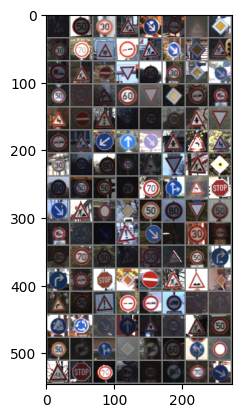

GroundTruth:  00028 00002 00001 00025


In [120]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [121]:
arch = ConvNet()
arch.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [122]:
outputs = arch(images)

In [123]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  00028 00002 00001 00025


In [124]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = arch(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 88 %


In [125]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = arch(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 00000 is 71.4 %
Accuracy for class: 00001 is 95.7 %
Accuracy for class: 00002 is 92.9 %
Accuracy for class: 00003 is 85.8 %
Accuracy for class: 00004 is 90.4 %
Accuracy for class: 00005 is 81.5 %
Accuracy for class: 00006 is 98.8 %
Accuracy for class: 00007 is 91.7 %
Accuracy for class: 00008 is 85.8 %
Accuracy for class: 00009 is 93.5 %
Accuracy for class: 00010 is 96.8 %
Accuracy for class: 00011 is 92.4 %
Accuracy for class: 00012 is 98.1 %
Accuracy for class: 00013 is 97.0 %
Accuracy for class: 00014 is 94.2 %
Accuracy for class: 00015 is 93.7 %
Accuracy for class: 00016 is 94.0 %
Accuracy for class: 00017 is 97.7 %
Accuracy for class: 00018 is 88.8 %
Accuracy for class: 00019 is 33.3 %
Accuracy for class: 00020 is 83.3 %
Accuracy for class: 00021 is 74.2 %
Accuracy for class: 00022 is 84.6 %
Accuracy for class: 00023 is 89.2 %
Accuracy for class: 00024 is 90.7 %
Accuracy for class: 00025 is 91.3 %
Accuracy for class: 00026 is 57.5 %
Accuracy for class: 00027 is